# BioImageSuiteLite: Comprehensive Analysis Guide

## Table of Contents
1. [Introduction](#introduction)
2. [Installation and Setup](#installation)
3. [Loading and Visualizing Data](#loading-data)
4. [ROI Definition and Management](#roi-management)
5. [Parameter Optimization](#parameter-optimization)
6. [Running Analysis](#running-analysis)
7. [Understanding Results](#understanding-results)
8. [Exporting and Post-Processing](#exporting)
9. [Troubleshooting](#troubleshooting)
10. [Advanced Tips](#advanced-tips)

---

## 1. Introduction <a id="introduction"></a>

BioImageSuiteLite is designed for detecting and analyzing transient cellular events in time-lapse microscopy data. This notebook provides a comprehensive guide to using all features of the software.

### What types of events can be detected?
- **Calcium transients** in neurons or other excitable cells
- **Vesicle fusion events** at the cell membrane
- **Fluorescence fluctuations** from reporter proteins
- Any **transient intensity changes** in time-lapse imaging

### Detection Methods Available:
1. **Threshold-based detection**: Finds events when intensity crosses a threshold
2. **Difference of Gaussians (DoG)**: Detects blob-like features and intensity peaks
3. **Scisson-like analysis**: For step-like changes (currently in development)

## 2. Installation and Setup <a id="installation"></a>

Before starting, ensure you have BioImageSuiteLite installed. If you're running this notebook from the repository, we'll set up the environment.


In [1]:
# Setup the environment
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Add parent directory to path if running from repo
if os.path.exists('../BioImageSuiteLite'):
    sys.path.insert(0, os.path.abspath('..'))
    print("✓ Added parent directory to Python path")
else:
    print("✓ Using installed BioImageSuiteLite package")

# Import BioImageSuiteLite modules
try:
    from BioImageSuiteLite import gui_manager, io_operations, analysis_processor, roi_handler
    print("✓ Successfully imported BioImageSuiteLite modules")
except ImportError as e:
    print("✗ Error importing modules:", e)
    print("Please ensure BioImageSuiteLite is properly installed")

# Set up matplotlib for inline plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
print("✓ Matplotlib configured for inline plotting")


✓ Added parent directory to Python path
2025-06-15 12:16:44 [INFO] BioImageSuiteLite: Logging initialized.
✓ Successfully imported BioImageSuiteLite modules
✓ Matplotlib configured for inline plotting


## 3. Loading and Visualizing Data <a id="loading-data"></a>

BioImageSuiteLite currently supports `.avi` video files. The software automatically converts color videos to greyscale for analysis.

### Step 3.1: Launch the GUI

First, let's launch the BioImageSuiteLite interface. A new window will open with the analysis tools.

**What to expect:**
- A Napari viewer window will open showing your data
- Control panels on the right side for analysis parameters
- Results table and log at the bottom

**Action required:** Run the cell below and wait for the GUI to open.

In [5]:
# Launch the BioImageSuiteLite GUI
print("Launching BioImageSuiteLite...")
print("=" * 50)
print("IMPORTANT: A new window will open")
print("Do NOT close this notebook while using the GUI")
print("=" * 50)

# Start the application
gui_manager.main()

# Note: The cell will continue running while the GUI is open
# This is normal - the GUI runs in its own event loop


Launching BioImageSuiteLite...
IMPORTANT: A new window will open
Do NOT close this notebook while using the GUI
2025-06-15 12:19:42 [INFO] BioImageSuiteLite: Logging initialized.


2025-06-15 12:19:43 [WARNING] vispy: QWindowsWindow::setGeometry: Unable to set geometry 1086x655+640+290 (frame: 1102x694+632+259) on QWidgetWindow/"_QtMainWindowClassWindow" on "\\.\DISPLAY1". Resulting geometry: 723x642+637+276 (frame: 739x681+629+245) margins: 8, 31, 8, 8 minimum size: 385x484 MINMAXINFO maxSize=0,0 maxpos=0,0 mintrack=401,523 maxtrack=0,0)
INFO: Pixel size set to 0.160 µm/pixel.


c:\kaushik\project_work\BioImageSuiteLite\BioImageSuiteLite\gui_manager.py:214: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.7.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  splitter.setSizes([int(self.viewer.window.qt_viewer.height() * 0.6), int(self.viewer.window.qt_viewer.height() * 0.4)]) # Initial sizes


Events by Detection Type:
Type
threshold    5
dog          4
Name: count, dtype: int64

Mean Duration by Type:
Type
dog          0.675
threshold    1.060
Name: Duration (s), dtype: float64


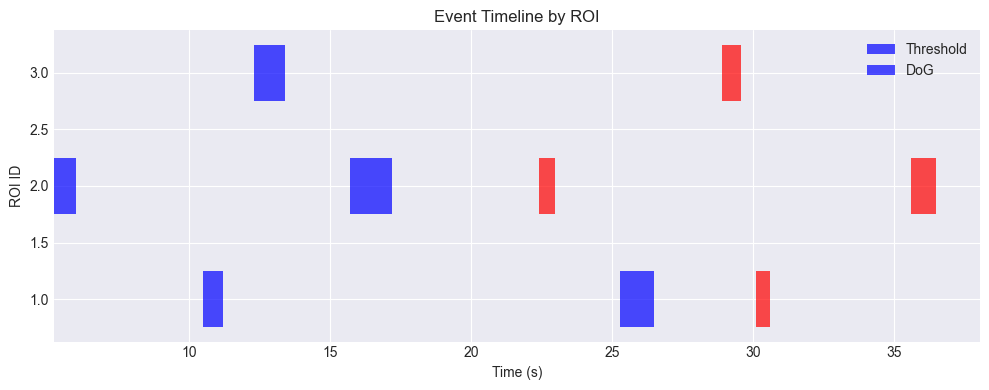

In [6]:
# Example: Post-processing exported CSV data
# This code demonstrates how to load and analyze your exported results

import pandas as pd
import matplotlib.pyplot as plt

# Example of loading exported CSV (replace with your file path)
# df = pd.read_csv('your_results.csv', skiprows=1)

# Create sample data for demonstration
sample_data = {
    'ROI ID': [1, 1, 1, 2, 2, 2, 2, 3, 3],
    'Type': ['threshold', 'threshold', 'dog', 'threshold', 'threshold', 'dog', 'dog', 'threshold', 'dog'],
    'Start (s)': [10.5, 25.3, 30.1, 5.2, 15.7, 22.4, 35.6, 12.3, 28.9],
    'Duration (s)': [0.7, 1.2, 0.5, 0.8, 1.5, 0.6, 0.9, 1.1, 0.7],
    'Events/s/µm²': [5.2e-03, 5.2e-03, 5.2e-03, 3.8e-03, 3.8e-03, 3.8e-03, 3.8e-03, 6.1e-03, 6.1e-03]
}

df = pd.DataFrame(sample_data)

# Analyze by detection type
print("Events by Detection Type:")
print(df['Type'].value_counts())
print("\nMean Duration by Type:")
print(df.groupby('Type')['Duration (s)'].mean())

# Plot event timeline
fig, ax = plt.subplots(figsize=(10, 4))
for roi_id in df['ROI ID'].unique():
    roi_data = df[df['ROI ID'] == roi_id]
    y_pos = roi_id
    for _, event in roi_data.iterrows():
        color = 'blue' if event['Type'] == 'threshold' else 'red'
        ax.barh(y_pos, event['Duration (s)'], left=event['Start (s)'], 
                height=0.5, color=color, alpha=0.7)

ax.set_xlabel('Time (s)')
ax.set_ylabel('ROI ID')
ax.set_title('Event Timeline by ROI')
ax.legend(['Threshold', 'DoG'])
plt.tight_layout()
plt.show()


In [7]:
# Example: Batch processing workflow (conceptual)
# Note: This requires programmatic access to the analysis functions

import os
from pathlib import Path

# Define batch processing function
def batch_process_videos(video_folder, output_folder, params):
    """
    Process multiple videos with the same parameters
    
    Args:
        video_folder: Path to folder containing .avi files
        output_folder: Where to save results
        params: Dictionary of analysis parameters
    """
    video_files = list(Path(video_folder).glob("*.avi"))
    
    results_summary = []
    
    for video_file in video_files:
        print(f"Processing: {video_file.name}")
        
        # Pseudocode for processing steps:
        # 1. Load video
        # frames, metadata = io_operations.load_avi(str(video_file))
        
        # 2. Convert to greyscale
        # grey_stack = io_operations.convert_to_greyscale_stack(frames)
        
        # 3. Define ROIs (could load from file or use automatic detection)
        # roi_manager = roi_handler.ROIManager(grey_stack.shape)
        
        # 4. Run analysis with specified parameters
        # results = run_analysis(grey_stack, roi_manager, params)
        
        # 5. Save results
        # output_path = output_folder / f"{video_file.stem}_results.csv"
        # save_results(results, output_path)
        
        # results_summary.append({
        #     'file': video_file.name,
        #     'n_events': len(results),
        #     'mean_rate': calculate_mean_rate(results)
        # })
    
    return results_summary

# Example parameters for batch processing
batch_params = {
    'threshold_enabled': True,
    'threshold_value': 128,
    'use_otsu': False,
    'dog_enabled': True,
    'dog_sigma1': 2.0,
    'dog_sigma2': 4.0,
    'dog_prominence': 10.0,
    'min_event_separation': 0.5
}

# Example usage (uncomment to run):
# results = batch_process_videos("./videos", "./results", batch_params)
